# Web Scraping Rental Apartment Data with Python and Beautifulsoup

Data from: https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn=1

## Libraries and settings

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Example of scraping data from a website with BeautifulSoup

In [2]:
# Send a GET request to the input URL
response = requests.get('https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn=1')

# Parse the content of the request with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the listings from the parsed content
# 'div' is the HTML tag (division) of the element that contains the listings
# 'class_' is the CSS class of the element that contains the listings
listings = soup.find_all('div', class_='HgListingRoomsLivingSpacePrice_roomsLivingSpacePrice_M6Ktp')

# Show first 10 listings
listings[0:10]


[<div class="HgListingRoomsLivingSpacePrice_roomsLivingSpacePrice_M6Ktp"><strong>6.5 Zimmer</strong><span>, </span><strong title="Wohnfläche">150m²</strong><span class="HgListingRoomsLivingSpacePrice_commaPrice_mXXpt">,</span><span class="HgListingRoomsLivingSpacePrice_price_u9Vee"> CHF 6’320.– <!-- --><!-- --></span></div>,
 <div class="HgListingRoomsLivingSpacePrice_roomsLivingSpacePrice_M6Ktp"><strong>6.5 Zimmer</strong><span>, </span><strong title="Wohnfläche">180m²</strong><span class="HgListingRoomsLivingSpacePrice_commaPrice_mXXpt">,</span><span class="HgListingRoomsLivingSpacePrice_price_u9Vee"> CHF 7’200.– <!-- --><!-- --></span></div>,
 <div class="HgListingRoomsLivingSpacePrice_roomsLivingSpacePrice_M6Ktp"><strong>4.5 Zimmer</strong><span>, </span><strong title="Wohnfläche">114m²</strong><span class="HgListingRoomsLivingSpacePrice_commaPrice_mXXpt">,</span><span class="HgListingRoomsLivingSpacePrice_price_u9Vee"> CHF 3’810.– <!-- --><!-- --></span></div>,
 <div class="HgList

## Web Scraper function

In [3]:
# Function to extract the listings from a given URL
def extract_listing_info(url):

    # Send a GET request to the input URL
    response = requests.get(url)

    # Parse the content of the request with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the listings from the parsed content
    listings = soup.find_all('div', class_='HgListingCard_info_RKrwz')
    
    # Initialize an empty list to store the extracted data
    extracted_data = []
    
    # Loop through the listings and extract the required information
    for listing in listings:
        # Extract address
        address_tag = listing.find('address')
        address = address_tag.text.strip() if address_tag else 'N/A'

        # Extract rooms, living area, and price
        info_section = listing.find('div', class_='HgListingRoomsLivingSpacePrice_roomsLivingSpacePrice_M6Ktp')
        if info_section:
            info_text = [strong.text.strip() for strong in info_section.find_all('strong')]
            rooms = info_text[0] if len(info_text) > 0 else 'N/A'
            living_area = info_text[1] if len(info_text) > 1 else 'N/A'
            price_tag = info_section.find('span', class_='HgListingRoomsLivingSpacePrice_price_u9Vee')
            price = price_tag.text.strip() if price_tag else 'N/A'
        else:
            rooms, living_area, price = 'N/A', 'N/A', 'N/A'

        # Extract title and description
        title_tag = listing.find('p', class_='HgListingDescription_title_NAAxy')
        title = title_tag.text.strip() if title_tag else 'N/A'

        description_tag = listing.find('p', class_='HgListingDescription_large_uKs3J')
        description = description_tag.text.strip() if description_tag else 'N/A'

        # Append extracted data to the list
        extracted_data.append({
            'address_raw': address,
            'rooms_raw': rooms,
            'area_raw': living_area,
            'price_raw': price,
            'title_raw': title,
            'description_raw': description
        })
    
    # Return the extracted data
    return extracted_data


## Call the Web Scraper function to get apartment data from the 1st page

In [4]:
# Scrape 1st page
url = 'https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn=1'

# Extract listing information to a list object 'data'
data = extract_listing_info(url)

# Create DataFrame from 'data'
df = pd.DataFrame(data)

# Show the first few rows of the DataFrame
df.head()

,address_raw,rooms_raw,area_raw,price_raw,title_raw,description_raw
0,"Weidmannstrasse 13, 8046 Zürich",6.5 Zimmer,150m²,CHF 6’320.–,Luxuriöse 6.5-Zimmerwohnung mit großzügigem Ga...,Moderne und wunderschöne 6.5-Zimmerwohnung mit...
1,"Bucheggstrasse 130, 8057 Zürich",6.5 Zimmer,180m²,CHF 7’200.–,Modernes wohnen am Bucheggplatz!,N/A
2,"Hagenholzstrasse 55, 8050 Zürich",4.5 Zimmer,114m²,CHF 3’810.–,MIETEN OHNE KAUTION - Tower fifty five - metro...,N/A
3,"Käferholzstrasse 48, 8057 Zürich",8.5 Zimmer,180m²,CHF 7’080.–,Modernes Wohnen im Guggachpark,N/A
4,"Anna-Heer-Strasse 14, 8057 Zürich",5.5 Zimmer,148m²,CHF 5’830.–,5.5 Zimmerwohnung in Zürich,An der Anna-Heer-Strasse in Zürich entstehen m...


## Call the Web Scraper function to get apartment data from multiple pages

In [5]:
# Scrape multiple pages
data = []
base_url = 'https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn='

for page in range(1, 4):  # pages 1 to 3
    url = base_url + str(page)
    print(f"Scraping {url}...")
    data.extend(extract_listing_info(url))

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('./data/rental_apartments_zuerich.csv', index=False)

print("\nData saved to real_estate_listings.csv")

# Show the first few rows of the DataFrame
df.head()

Scraping https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn=1...
Scraping https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn=2...
Scraping https://www.immoscout24.ch/de/immobilien/mieten/ort-zuerich?pn=3...

Data saved to real_estate_listings.csv


,address_raw,rooms_raw,area_raw,price_raw,title_raw,description_raw
0,"Weidmannstrasse 13, 8046 Zürich",6.5 Zimmer,150m²,CHF 6’320.–,Luxuriöse 6.5-Zimmerwohnung mit großzügigem Ga...,Moderne und wunderschöne 6.5-Zimmerwohnung mit...
1,"Bucheggstrasse 130, 8057 Zürich",6.5 Zimmer,180m²,CHF 7’200.–,Modernes wohnen am Bucheggplatz!,N/A
2,"Hagenholzstrasse 55, 8050 Zürich",4.5 Zimmer,114m²,CHF 3’810.–,MIETEN OHNE KAUTION - Tower fifty five - metro...,N/A
3,"Käferholzstrasse 48, 8057 Zürich",8.5 Zimmer,180m²,CHF 7’080.–,Modernes Wohnen im Guggachpark,N/A
4,"Anna-Heer-Strasse 14, 8057 Zürich",5.5 Zimmer,148m²,CHF 5’830.–,5.5 Zimmerwohnung in Zürich,An der Anna-Heer-Strasse in Zürich entstehen m...


## Extract prices from strings using a regular expression (regex)

In [6]:
# Extract prices from the 'price_raw' column using a regular expression (regex)
df['price'] = df['price_raw'].str.extract(r'(\d[\d’]*\d)')

# Remove thousands separator and convert to float
df['price'] = df['price'].str.replace('’', '').astype(float)

# Show the first few rows of the DataFrame (selected columns)
df[['address_raw', 'rooms_raw', 'area_raw', 'price_raw', 'price']].head()

,address_raw,rooms_raw,area_raw,price_raw,price
0,"Weidmannstrasse 13, 8046 Zürich",6.5 Zimmer,150m²,CHF 6’320.–,6320.0
1,"Bucheggstrasse 130, 8057 Zürich",6.5 Zimmer,180m²,CHF 7’200.–,7200.0
2,"Hagenholzstrasse 55, 8050 Zürich",4.5 Zimmer,114m²,CHF 3’810.–,3810.0
3,"Käferholzstrasse 48, 8057 Zürich",8.5 Zimmer,180m²,CHF 7’080.–,7080.0
4,"Anna-Heer-Strasse 14, 8057 Zürich",5.5 Zimmer,148m²,CHF 5’830.–,5830.0


## Create histogram of prices

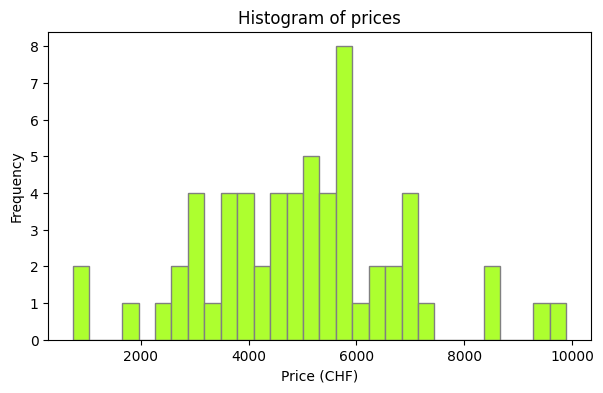

In [7]:
# Plot a histogram of the prices
plt.figure(figsize=(7, 4))
plt.hist(df['price'], bins=30, color='greenyellow', edgecolor='gray')
plt.title('Histogram of prices')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.show()


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')